## importing necessary librareies 

In [153]:
import gym_bandits
import gym
import numpy as np
import matplotlib.pyplot as plt
import scipy
seed=42
np.random.seed(seed)


In [86]:
env=gym.make('BanditTenArmedGaussian-v0')

C:\Users\ramin\anaconda3\envs\ramin\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\ramin\anaconda3\envs\ramin\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## greedy algorithm

In [4]:
class greedy():
    def __init__(self,env):
        self.env=env
        self.env.reset()
        # defining action space
        self.actions=range(0,10)
        # selected actions counter :
        self.N_ta=np.zeros(10,)
        # initializing Q table with zeros Q-values 
        self.q_table=np.zeros(10,)
    # this function will select action greedly and returns achieved reward from that action
    def action_selection(self):
        # selecting greedy action
        selected_action=np.argmax(self.q_table)
        # updating counter 
        self.N_ta[selected_action]+=1
        # getting reward with implementing selected action in environment
        _,reward,_,_=self.env.step(selected_action)
        # updating action values with incremental computation
        # q(t)=q(t-1)+[1/N(t)]*[R(t)-q(t-1)]
        self.q_table[selected_action]=self.q_table[selected_action]+\
        1/self.N_ta[selected_action]*(reward-self.q_table[selected_action])
        return reward
        
        

## test greedy policy

In [5]:
greedy_policy=greedy(env)
rewards=[]
average_rewards_greedy=[]
for i in range(200):
    for j in range(2000):
        rewards.append(greedy_policy.action_selection())
    average_rewards_greedy.append(np.average(np.array(rewards)))
    rewards=[]
    

C:\Users\ramin\anaconda3\envs\ramin\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
C:\Users\ramin\anaconda3\envs\ramin\lib\site-packages\gym\utils\passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
C:\Users\ramin\anaconda3\envs\ramin\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
C:\Users\ramin\anaconda3\envs\ramin\lib\site-packages\gym\utils\passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one boo

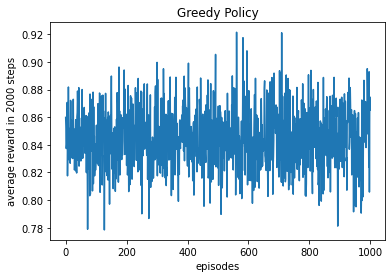

In [120]:
plt.plot(average_rewards_greedy)
plt.title('Greedy Policy')
plt.xlabel('episodes')
plt.ylabel('average reward in 2000 steps')
plt.savefig('greedy policy',dpi=1000)
plt.show()

## epsilon greedy policy

In [6]:
class epsilon_greedy():
    def __init__(self,env,epsilon):
        self.env=env
        # determine epsilon value
        self.epsilon=epsilon
        self.env.reset()
        # defining action space
        self.actions=range(0,10)
        # selected action counter 
        self.N_ta=np.zeros(10,)
        # initializing Q-table with zero Q values
        self.q_table=np.zeros(10,)
    def action_selection(self):
        # selectes randomly
        if self.epsilon>np.random.rand(1):
            selected_action=np.random.choice(range(10))
        # selects greedly
        else:
            selected_action=np.argmax(self.q_table)
        # updating counter 
        self.N_ta[selected_action]+=1
        # getting reward
        _,reward,_,_=self.env.step(selected_action)
        # updating action values 
        # q(t)=q(t-1)+[1/N(t)]*[R(t)-q(t-1)]
        self.q_table[selected_action]=self.q_table[selected_action]+\
        1/self.N_ta[selected_action]*(reward-self.q_table[selected_action])
        return reward
        
        

## test epsilon greedy policy

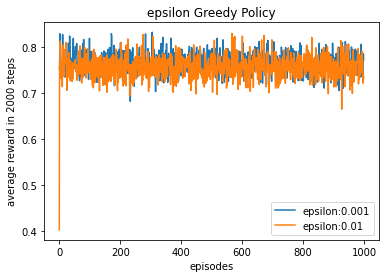

In [12]:
# epsilon greedy - epsilon =0.001
epsilon_greedy_polic=epsilon_greedy(env,0.001)
rewards=[]
average_rewards_egreedy_OneTenth=[]
for i in range(1000):
    for j in range(2000):
        rewards.append(epsilon_greedy_polic.action_selection())
    average_rewards_egreedy_OneTenth.append(np.average(np.array(rewards)))
    rewards=[]
plt.plot(average_rewards_egreedy_OneTenth,label='epsilon:0.001')
plt.title('epsilon Greedy Policy')
plt.xlabel('episodes')
plt.ylabel('average reward in 2000 steps')
# epsilon greedy - epsilon =0.001
epsilon_greedy_polic=epsilon_greedy(env,0.01)
rewards=[]
average_rewards_egreedy_OnePrecent=[]
for i in range(1000):
    for j in range(2000):
        rewards.append(epsilon_greedy_polic.action_selection())
    average_rewards_egreedy_OnePrecent.append(np.average(np.array(rewards)))
    rewards=[]
plt.plot(average_rewards_egreedy_OnePrecent,label='epsilon:0.01')
plt.legend()
#plt.savefig('epsilon greedy policy',dpi=1000)
plt.show()

## softmax policy

In [158]:

class policy_gradient():
    def __init__(self,env,alpha):
        self.env=env
        # detemine learning rate
        self.alpha=alpha
        self.env.reset()
        # determine actions 
        self.actions=range(0,10)
        # initializing action prefrences with sampling normal distribution with mean=0 and std=10
        self.action_prefrences=np.ones(10,)
    # gradient calculator function
    def gradient_assent(self,action_prefrences,selected_action,reward,action_probs):
        old_action_prefrences=action_prefrences
        
        # update not selected actions prefrences according gradient assent formula for softmax policy function:
        # H(t+1)=H(t)-alpha*reward*(P(t)) where p(t) is probability of choosing each action
        action_prefrences=action_prefrences-\
                self.alpha*reward*(action_probs)
        
        # update selected action prefrence according gradient assent formula for softmax policy function:
        # H(t+1)=H(t)+alpha*reward*(1-P(t))
        action_prefrences[selected_action]=old_action_prefrences[selected_action]+\
                self.alpha*reward*(1-action_probs[selected_action])

        return action_prefrences
        
    def action_selection(self):
        # calculation each action probabilities using softmax function 
        action_probs=scipy.special.softmax(self.action_prefrences)
        # selecting action with sampling from softmax distribution
        #selected_action=np.argmax(action_probs)
        selected_action=np.random.choice(self.actions,p=action_probs)
        _,reward,_,_=self.env.step(selected_action)
        # updating action prefrences using gradient assent 
        self.action_prefrences=self.gradient_assent(self.action_prefrences,selected_action,reward,action_probs)
        return reward
        # stochastic gradient assent from softmax function
    

In [159]:
gradient_bandit=policy_gradient(env,0.002)
rewards=[]
average_rewards_gradient=[]
for i in range(500):
    for j in range(500):
        rewards.append(gradient_bandit.action_selection())
    average_rewards_gradient.append(np.average(np.array(rewards)))
    rewards=[]

AttributeError: module 'scipy' has no attribute 'special'

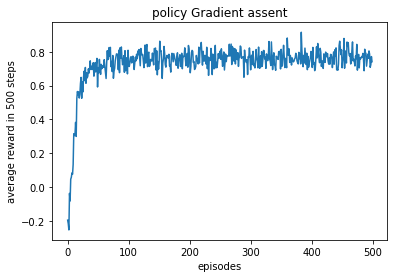

In [88]:
plt.plot(average_rewards_gradient)
plt.title('policy Gradient assent')
plt.xlabel('episodes')
plt.ylabel('average reward in 500 steps')
#plt.savefig('gradient bandit-500steps-500episode',dpi=1000)

## UCB algorithm

In [31]:
class UCB():
    def __init__(self,env,C):
        self.q_table=np.ones(10,)*10
        
        # for avoiding zero deviding initialize selected actions counter with one values:
        self.N_ta=np.ones(10,)
        self.env=env
        self.env.reset()
        # detrmine constanr value : C
        self.C=C
        # time counter 
        self.counter=1
    def action_selection(self):
        self.counter+=1
        selected_action=np.argmax(self.q_table+self.C*self.upper_bound_calculator(self.counter,self.N_ta))
        n=self.N_ta
        a=self.q_table
        # update N_ta
        self.N_ta[selected_action]=self.N_ta[selected_action]+1
        # get reward
        _,reward,_,_=self.env.step(selected_action)
        # update Q-table
        self.q_table[selected_action]=self.q_table[selected_action]+\
        (1/self.N_ta[selected_action])*(reward-self.q_table[selected_action])
        '''print('--------------')
        print(selected_action)
        print('---------------')
        print(reward)
        
        print(self.q_table)
        print(self.N_ta)
        print()'''
        return reward
        
        
    # upeer bound confidence calculater 
    # u= log(log(t)/2*N(t))
    def upper_bound_calculator(self,counter,N_ta):
        global U_ta
        U_ta=np.sqrt((np.log(counter))/(N_ta))
        
 
        return U_ta

In [42]:
ucb=UCB(env,2)
rewards=[]
average_rewards_ucb=[]
for i in range(100):
    for j in range(300):
        rewards.append(ucb.action_selection())
    average_rewards_ucb.append(np.average(np.array(rewards)))
    rewards=[]



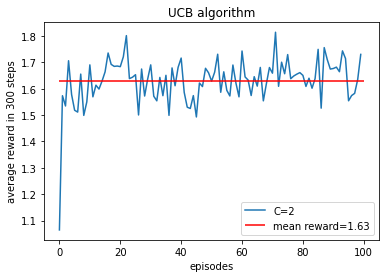

In [45]:
plt.plot(average_rewards_ucb,label='C=2')
#plt.yticks(np.arange(1,2,0.5))
plt.hlines(y=np.mean(average_rewards_ucb),xmin=0,xmax=100,color='r',
           label=f'mean reward={np.round(np.mean(average_rewards_ucb),3)}')
plt.title('UCB algorithm')
plt.xlabel('episodes')
plt.ylabel('average reward in 300 steps')
plt.legend()
plt.savefig('UCB.',dpi=1000)

## baysian Agent

In [100]:
class thonpson_sampling():
    def __init__(self,env):
        self.env=env
        self.env.reset()
        
        # prior distribution parameters
            # large std for exploration
        self.std=50
        self.mean=5
        # defining prior distribution for each action
        self.priors=[np.random.normal(self.mean,self.std) for i in range(10)]
        self.N_ta=np.zeros(10,)
        self.rewards=np.zeros(10,)
    
    def action_selection(self):
        selected_action=np.argmax(self.priors)
        # get reward 
        _,reward,_,_=self.env.step(selected_action)
        # updating_priors
        self.rewards[selected_action]=self.rewards[selected_action]+reward
        self.N_ta[selected_action]+=1
        new_squerd_std=(1/self.std**2+self.N_ta[selected_action])
        new_mean=new_squerd_std*(self.rewards[selected_action])
        self.priors=[np.random.normal(self.mean,self.std) for i in range(10)]
        self.priors[selected_action]=np.random.normal(new_mean,np.sqrt(new_squerd_std))
        
        return reward
        
        

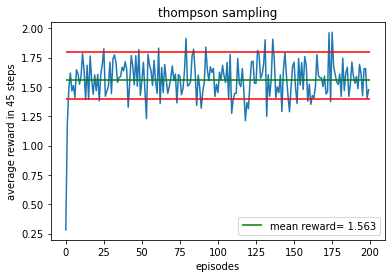

In [148]:
baysian_agent=thonpson_sampling(env)
rewards=[]
average_rewards_baysian=[]
for i in range(200):
    for j in range(45):
        rewards.append(baysian_agent.action_selection())
    average_rewards_baysian.append(np.average(np.array(rewards)))
    rewards=[]
#plt.yticks(np.arange(0,3,1))
plt.plot(average_rewards_baysian)
plt.hlines(1.8,0,200,color='r')
plt.hlines(1.4,0,200,color='r')
plt.hlines(np.mean(average_rewards_baysian),0
           ,200,color='g',label=f'mean reward= {np.round(np.mean(average_rewards_baysian),3)}')
plt.title('thompson sampling')
plt.xlabel('episodes')
plt.ylabel('average reward in 45 steps')
plt.legend()
plt.savefig('baisian',dpi=1000)
